In [ ]:
!pip install kaggle


In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"priyavmehta","key":"a66426a92bb4481dca6e1234c8b46da7"}'}

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

# Change permission
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d adityajn105/flickr8k

 99% 1.03G/1.04G [00:22<00:00, 71.9MB/s]
100% 1.04G/1.04G [00:22<00:00, 50.4MB/s]


In [ ]:
from zipfile import ZipFile
filename = 'flickr8k.zip'

with ZipFile(filename, 'r') as zip:
  zip.extractall()
  print("Done")

Done


In [ ]:
import os
print(len(os.listdir('./Images')))

8091


In [ ]:
print(os.listdir('./Images')[0])

3446762868_06e9d9d899.jpg


In [ ]:
from keras.applications.vgg16 import VGG16
from keras.models import Sequential

vgg16 = VGG16()

model = Sequential()
for layer in vgg16.layers[:-1]: # go through until last layer
    model.add(layer)
print(model.summary())

553467904/553467096 [==============================] - 8s 0us/step
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_______________________________________________________

In [ ]:
#### First we will save the features of all the images in a pickle file ####

# importing necessary libraries
# We will use pre-trained VGG16 model to extract features from images.
import os
from pickle import dump
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing.image import load_img, img_to_array
from keras.models import Model, Sequential

# We will make a function to extract features from each image in the directory.

def extract_features(directory_name):

  # loading the restructuring the VGG16 model

  vgg16 = VGG16()

  model = Sequential()
  for layer in vgg16.layers[:-1]: # go through until last layer
      model.add(layer)

  print(model.summary())

  features = dict()

  for name in os.listdir(directory_name):

    filename = directory_name + '/' + name
    image = load_img(filename, target_size = (224,224))
    image = img_to_array(image)
    image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))
    image = preprocess_input(image)
    feature = model.predict(image, verbose = 0)
    image_id = name.split('.')[0]
    features[image_id] = feature
  
  return features

directory = './Images'
features = extract_features(directory)
print(len(features))
dump(features, open('features.pkl', 'wb'))

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)      

In [ ]:
print(os.listdir())

['.config', 'captions.txt', 'features.pkl', 'flickr8k.zip', 'kaggle.json', 'Images', 'sample_data']


In [ ]:
import string

# loading the captions.txt file
def load_file(filename):
  file = open(filename, 'r')
  captions = file.read()
  file.close()
  return captions

# extracting descriptions from each line in file
def extract_descriptions(doc):
  mapping = dict()
  lines = doc.split('\n')
  lines.remove('image,caption')
  
  for line in lines:
    tokens = line.split(',')
    image_id, image_desc = tokens[0], tokens[1:]
    image_id = image_id.split('.')[0]
    image_desc = ' '.join(image_desc)

    if image_id not in mapping:
      mapping[image_id] = list()

    mapping[image_id].append(image_desc)
  
  return mapping

# cleaning the descriptions
def clean_descriptions(descriptions):
  table = str.maketrans('', '', string.punctuation)

  for key, desc_list in descriptions.items():
    for i in range(len(desc_list)):

      desc = desc_list[i]
      desc = desc.split()
      desc = [word.lower() for word in desc]
      desc = [w.translate(table) for w in desc]
      desc = [word for word in desc if len(word) > 1]
      desc = [word for word in desc if word.isalpha()]
      desc_list[i] = ' '.join(desc)

# Making a vocabulary
def to_vocabulary(descriptions):
  words = set()
  for key in descriptions.keys():
    [words.update(d.split()) for d in descriptions[key]]
  return words

# saving the descriptions in another txt file
def save_descriptions(descriptions, filename):
  lines = list()

  for key, desc_list in descriptions.items():
    for desc in desc_list:
      lines.append(key + ' ' + desc)
  
  data = '\n'.join(lines)
  file = open(filename, 'w')
  file.write(data)
  file.close()

In [ ]:
# reading the captions.txt file
captions = load_file('captions.txt')
print(captions[0:400])

# extracting all the descriptions
descriptions = extract_descriptions(captions)
print(descriptions.get('1000268201_693b08cb0e'))
print("Total descriptions are :", len(descriptions))

# cleaning the descriptions
clean_descriptions(descriptions)

# making a vocabulary out of these descriptions
vocabulary = to_vocabulary(descriptions)
print("Vocabulary length is :", len(vocabulary))

# saving the file
save_descriptions(descriptions, 'descriptions.txt')

image,caption
1000268201_693b08cb0e.jpg,A child in a pink dress is climbing up a set of stairs in an entry way .
1000268201_693b08cb0e.jpg,A girl going into a wooden building .
1000268201_693b08cb0e.jpg,A little girl climbing into a wooden playhouse .
1000268201_693b08cb0e.jpg,A little girl climbing the stairs to her playhouse .
1000268201_693b08cb0e.jpg,A little girl in a pink dress going into a 
['A child in a pink dress is climbing up a set of stairs in an entry way .', 'A girl going into a wooden building .', 'A little girl climbing into a wooden playhouse .', 'A little girl climbing the stairs to her playhouse .', 'A little girl in a pink dress going into a wooden cabin .']
Total descriptions are : 8092
Vocabulary length is : 8763


In [ ]:
print(os.listdir())

['.config', 'captions.txt', 'features.pkl', 'flickr8k.zip', 'descriptions.txt', 'kaggle.json', 'Images', 'sample_data']


In [ ]:
from pickle import load

# load doc into memory
def load_doc(filename):
  file = open(filename, 'r')
  text = file.read()
  file.close()
  return text

# load a pre-defined list of photo identifiers
def load_dataset(filename):
  doc = load_doc(filename)
  lines = doc.split('\n')
  lines.remove('image,caption')
  dataset = list()

  for line in lines:
    if len(line) < 1:
      continue
    image_id = line.split('.')[0]
    dataset.append(image_id)
  
  return set(dataset)

# loading clean descriptions
def load_clean_descriptions(filename, dataset):
  doc = load_doc(filename)

  descriptions = dict()

  for line in doc.split('\n'):

    tokens = line.split()
    if len(tokens) > 1:
      image_id, image_desc = tokens[0], tokens[1:]

      if image_id in dataset:
        if image_id not in descriptions:
          descriptions[image_id] = list()
      
        desc = 'startseq ' + ' '.join(image_desc) + ' endseq'
        descriptions[image_id].append(desc)
  
  return descriptions

# loading image features
def load_image_features(filename, dataset):
  all_features = load(open(filename, 'rb'))

  features = {k: all_features[k] for k in dataset}
  return features

In [ ]:
# Getting the image names
filename = 'captions.txt'
train = load_dataset(filename)
print(len(train))

# get image name with its descriptions
train_descriptions = load_clean_descriptions('descriptions.txt', train)
print("Total descriptions", len(train_descriptions))

# loading image features
train_features = load_image_features('features.pkl', train)
print("Total features", len(train_features))

train_descriptions

8091
Total descriptions 8091
Total features 8091


{'1000268201_693b08cb0e': ['startseq child in pink dress is climbing up set of stairs in an entry way endseq',
  'startseq girl going into wooden building endseq',
  'startseq little girl climbing into wooden playhouse endseq',
  'startseq little girl climbing the stairs to her playhouse endseq',
  'startseq little girl in pink dress going into wooden cabin endseq'],
 '1001773457_577c3a7d70': ['startseq black dog and spotted dog are fighting endseq',
  'startseq black dog and tricolored dog playing with each other on the road endseq',
  'startseq black dog and white dog with brown spots are staring at each other in the street endseq',
  'startseq two dogs of different breeds looking at each other on the road endseq',
  'startseq two dogs on pavement moving toward each other endseq'],
 '1002674143_1b742ab4b8': ['startseq little girl covered in paint sits in front of painted rainbow with her hands in bowl endseq',
  'startseq little girl is sitting in front of large painted rainbow endse

In [ ]:
# importing libraries
from numpy import array
import tensorflow
from pickle import load
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical
from keras.utils import plot_model
from keras.models import Model
from keras.layers import Input
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Embedding
from keras.layers import Dropout
from keras.layers.merge import add
from keras.callbacks import ModelCheckpoint


# Creating a list of descriptions
def to_lines(descriptions):
  all_desc = list()

  for key in descriptions.keys():
    [all_desc.append(d) for d in descriptions[key]]

  return all_desc

def create_tokenizer(descriptions):
  lines = to_lines(descriptions)
  tokenizer = Tokenizer()
  tokenizer.fit_on_texts(lines)
  return tokenizer

In [ ]:
tokenizer = create_tokenizer(train_descriptions)
vocab_size = len(tokenizer.word_index) + 1
print("Vocabulary size", vocab_size)

Vocabulary size 8766


In [ ]:
# returning max length description
def max_length(descriptions):
  lines = to_lines(descriptions)
  return max(len(d.split()) for d in lines)


max_len = max_length(train_descriptions)

In [ ]:
desc_list = train_descriptions["1024138940_f1fefbdce1"]
desc = desc_list[0]
seq = tokenizer.texts_to_sequences([desc])[0]
print(seq)

for i in range(1, len(seq)):
  in_seq, out_seq = seq[:i], seq[i]
  print(in_seq)
  in_seq = pad_sequences([in_seq], maxlen=max_len)[0]
  out_seq = to_categorical([out_seq], num_classes=vocab_size)[0]

  print(in_seq)
  print(out_seq)

[1, 12, 736, 2640, 11, 26, 7, 13, 30, 85, 5, 4, 65, 2]
[1]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1]
[0. 0. 0. ... 0. 0. 0.]
[1, 12]
[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  1 12]
[0. 0. 0. ... 0. 0. 0.]
[1, 12, 736]
[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   1  12 736]
[0. 0. 0. ... 0. 0. 0.]
[1, 12, 736, 2640]
[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    1   12  736 2640]
[0. 0. 0. ... 0. 0. 0.]
[1, 12, 736, 2640, 11]
[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    1   12  736 2640   11]
[0. 0. 0. ... 0. 0. 0.]
[1, 12, 736, 2640, 11, 26]
[   0    0    0    0    0    0    0    0    0    0    0    0    0    

In [ ]:
# create sequences of images, input sequences and output words for an image
def create_sequences(tokenizer, maxLength, desc_list, photo):
  X1, X2, y = list(), list(), list()

  for desc in desc_list:

    seq = tokenizer.texts_to_sequences([desc])[0]
    
    for i in range(1, len(seq)):
      in_seq, out_seq = seq[:i], seq[i]
      in_seq = pad_sequences([in_seq], maxlen=maxLength)[0]
      out_seq = to_categorical([out_seq], num_classes=vocab_size)[0]

      X1.append(photo)
      X2.append(in_seq)
      y.append(out_seq)
  
  return array(X1), array(X2), array(y)

# Creating a captioning model.

def define_model(vocab_size, maxLen):

  # Feature Extraction Model
  inputs1 = Input(shape=(4096,))
  fe1 = Dropout(0.5)(inputs1)
  fe2 = Dense(256, activation='relu')(fe1)

  # sequence Model
  inputs2 = Input(shape=(maxLen,))
  se1 = Embedding(vocab_size, 256, mask_zero=True)(inputs2)
  se2 = Dropout(0.5)(se1)
  se3 = LSTM(256)(se2)

  # Decoder Model
  decoder1 = add([fe2, se3])
  decoder2 = Dense(256, activation='relu')(decoder1)
  outputs = Dense(vocab_size, activation='softmax')(decoder2)

  model = Model(inputs=[inputs1, inputs2], outputs=outputs)
  model.compile(optimizer='adam', loss='categorical_crossentropy')
  print(model.summary())
  return model 

In [ ]:
# Building a generator
def data_generator(descriptions, photos, tokenizer, max_len):
  while 1:
    for key, desc_list in descriptions.items():

      photo = photos[key][0]
      in_img, in_seq, out_word = create_sequences(tokenizer, max_len, desc_list, photo)
      yield ([array(in_img), array(in_seq)], array(out_word))

In [ ]:
# Preparing all the variables

# image names
filename = 'captions.txt'
train = load_dataset(filename)
print("Dataset Lenght :", len(train))

# Descriptions
train_descriptions = load_clean_descriptions('descriptions.txt', train)
print("Total Descriptions :", len(train_descriptions))

# image features
train_features = load_image_features('features.pkl', train)
print("Total features :", len(train_features))

# creating tokenizer
tokenizer = create_tokenizer(train_descriptions)

# retrieving vocab size and maximum length of description
vocab_size = len(tokenizer.word_index) + 1
max_len = max_length(train_descriptions)

print("Vocabulary size :", vocab_size)
print("Maximum description length :", max_len)

Dataset Lenght : 8091
Total Descriptions : 8091
Total features : 8091
Vocabulary size : 8766
Maximum description length : 34


In [ ]:
# train the model

model = define_model(vocab_size, max_len)
epochs = 10
steps = len(train_descriptions)

for i in range(epochs):
  generator = data_generator(train_descriptions, train_features, tokenizer, max_len)
  model.fit_generator(generator, epochs=1,steps_per_epoch=steps,verbose = 1)
  model.save('model_' + str(i) + '.h5')

8091/8091 [==============================] - 872s 108ms/step - loss: 3.2424


In [ ]:
os.listdir()

['.config',
 'model_0.h5',
 'model_4.h5',
 'model_9.h5',
 'model_3.h5',
 'captions.txt',
 'model_7.h5',
 'features.pkl',
 'model_1.h5',
 'model_2.h5',
 'model_5.h5',
 'model_8.h5',
 'flickr8k.zip',
 'model_6.h5',
 'descriptions.txt',
 'kaggle.json',
 'Images',
 'sample_data']

In [ ]:
import pickle

# saving
with open('tokenizer.pke', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [ ]:
all_features = load(open('features.pkl', 'rb'))
print(all_features)

{'3446762868_06e9d9d899': array([[2.602291 , 0.       , 5.0504484, ..., 0.       , 0.       ,
        0.8915274]], dtype=float32), '3135826945_f7c741e5b7': array([[0.7104586, 0.       , 0.       , ..., 0.       , 0.       ,
        2.7338068]], dtype=float32), '848180689_d67a1361ce': array([[0.       , 0.       , 2.3128145, ..., 0.       , 0.       ,
        0.       ]], dtype=float32), '2086534745_1e4ab80078': array([[0., 0., 0., ..., 0., 0., 0.]], dtype=float32), '2121140070_a09644550b': array([[1.6245786, 0.       , 0.       , ..., 0.       , 4.1013923,
        2.091947 ]], dtype=float32), '449352117_63c359c6e7': array([[3.415883  , 0.42891437, 2.3303833 , ..., 0.36273804, 0.        ,
        1.5957601 ]], dtype=float32), '3124838157_7ef96745b7': array([[0.        , 0.        , 0.        , ..., 0.        , 0.4656375 ,
        0.28220817]], dtype=float32), '3103264875_2a8d534abc': array([[0.        , 0.        , 0.1811319 , ..., 0.        , 1.249116  ,
        0.93362296]], dtype=flo

In [ ]:
from keras.models import load_model
model_9 = load_model('model_9.h5')
model_8 = load_model('model_8.h5')
model_7 = load_model('model_7.h5')
model_6 = load_model('model_6.h5')
model_5 = load_model('model_5.h5')
model_4 = load_model('model_4.h5')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
os.chdir("/content/drive/My Drive/")

In [ ]:
os.chdir('Image Captioning')

In [ ]:
os.listdir()

[]

In [ ]:
model_9.save('ImageCaptioning_9.h5')

In [ ]:
model_8.save('ImageCaptioning_8.h5')
model_7.save('ImageCaptioning_7.h5')
model_6.save('ImageCaptioning_6.h5')
model_5.save('ImageCaptioning_5.h5')
model_4.save('ImageCaptioning_4.h5')

In [ ]:
dump(features, open('Image_features.pkl', 'wb'))

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
os.chdir('/content/drive/My Drive/Image Captioning/')

In [3]:
os.listdir()

['tokenizer.pickle',
 'captions.txt',
 'descriptions.txt',
 'ImageCaptioning_9.h5',
 'ImageCaptioning_8.h5',
 'ImageCaptioning_7.h5',
 'Image_features.pkl']

In [4]:
from pickle import load
tokenizer = load(open('tokenizer.pickle', 'rb'))

In [5]:
from keras.applications.vgg16 import VGG16
from keras.models import Model, Sequential

model = VGG16()
vgg_16_model = Sequential()
for layer in model.layers[:-1]:
  vgg_16_model.add(layer)

vgg_16_model.save('vgg16_model_for_features_extraction.h5')

553467904/553467096 [==============================] - 10s 0us/step


In [15]:
# Now we will write code for generating captions
from keras.preprocessing.sequence import pad_sequences
from numpy import argmax
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.applications.vgg16 import preprocess_input

def index_to_word(id, tokenizer):
  for word, index in tokenizer.word_index.items():
    if id == index:
      return word

  return None

# Generating caption for a particular image
def generate_caption(model, tokenizer, max_length, image):

  caption = "startseq" # Starting the caption

  for i in range(max_length):

    sequence = tokenizer.texts_to_sequences([caption])[0]
    sequence = pad_sequences([sequence], maxlen = max_length)
    predicted_index = model.predict([image, sequence], verbose = 0)
    predicted_index = argmax(predicted_index)
    predicted_word = index_to_word(predicted_index, tokenizer)
    if predicted_word is None:
      break
    caption = caption + ' ' + predicted_word
    if predicted_word == 'endseq':
      break
  
  return caption

# Extracting features from an image
def extract_features(model, filename):
  image = load_img(filename, target_size = (224, 224))
  image = img_to_array(image)
  image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))
  image = preprocess_input(image)
  features = model.predict(image)
  return features

In [29]:
from keras.models import load_model
import matplotlib.pyplot as plt
from keras.preprocessing.image import load_img
%matplotlib inline

def predict(filename):
  caption_model = load_model('ImageCaptioning_9.h5')
  vgg16_model = load_model('vgg16_model_for_features_extraction.h5')
  max_length = 34
  features = extract_features(vgg_16_model, filename)
  caption = generate_caption(caption_model, tokenizer, max_length, features)
  caption = caption.split()
  caption = ' '.join(caption[1:len(caption)-1])
  image = load_img(filename)
  plt.imshow(image)
  plt.show()
  return caption

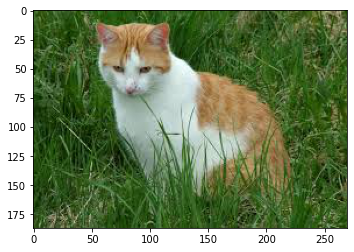

dog is running through the grass


In [25]:
caption = predict('sample_image.jpg')
print(caption)

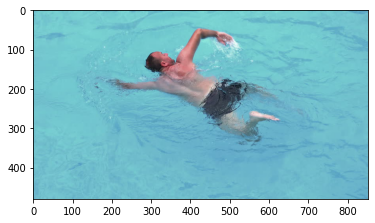

boy in red bathing suit is jumping into pool


In [26]:
caption = predict('man_swimming.jpg')
print(caption)

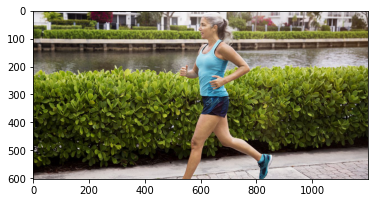

two children are playing in the water


In [27]:
caption = predict('woman_running.jpg')
print(caption)

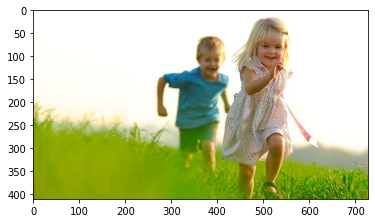

two children are playing in the water


In [30]:
caption1 = predict('kids_playing.jpg')
print(caption1)